In [1]:
import sys
sys.path.append('/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/GP_models')
sys.path.append('/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower')
import helper
import numpy as np
from onset_detection import detected_samples
import matplotlib.pyplot as plt

import scipy.io.wavfile as wav
from datetime import datetime
import least_squares
from librosa import note_to_hz as hz
import sys
sys.path.append('/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/midi')
from midi import process_midi_to_note_info, notes_to_chords, dict_to_frequency_list, plot_piece



/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/GP_models/least_squares.py:17: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wav.read(wav_file)


In [2]:
beethoven_chords = [['E4', 'G#4', 'B4', 'E5', 'G#5'],
                    ['B#3', 'D#4', 'F#4', 'A4', 'D#5', 'F#5'], ['C#4', 'E4', 'G#4', 'C#5', 'D#5'], ['G#3', 'B#3', 'D#4', 'F#4', 'B#4', 'D#5']]
beethoven_freqs = [hz(notes) for notes in beethoven_chords]

/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/GP_models/onset_detection.py:13: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wav.read(path)


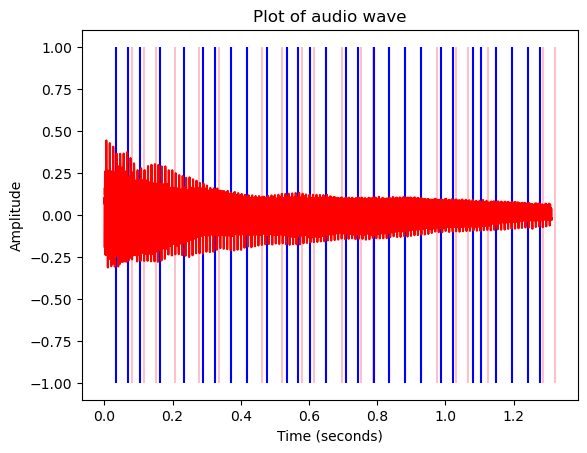

In [3]:
link =     '/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/wav_files/G_196_D_293.wav'
sample_data, sample_rate, onset_times = detected_samples(
link, sample_length=2000, offset=0, show=True, delta=0.01, num_samples=200000, normalise=False)
plt.show()
time_samples = np.linspace(
    0, len(sample_data[0])/sample_rate, len(sample_data[0]))




ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (28,) + inhomogeneous part.

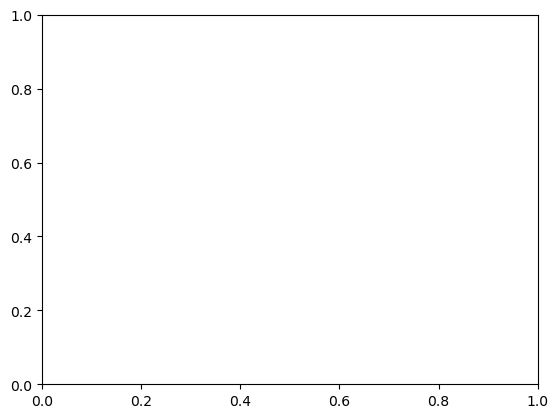

In [4]:
helper.plot_audio(time_samples,sample_data)

In [6]:
f=[ 196, 293]
T=4.065
v=2.07
sigma_n = 0.001
M=9
# print(np.exp(-helper.relative_nlml(time_samples, sample_data[0], M=10, f=f, T=T,v=v,normalised=True)))
# print(np.exp(-helper.relative_nlml(time_samples, sample_data[0], M=10, f=f, T=T,v=v,normalised=True, amplitude=[100,100,100])))

[0.10653088 0.11995582 0.13390462 ... 0.18228698 0.1756779  0.16806574]


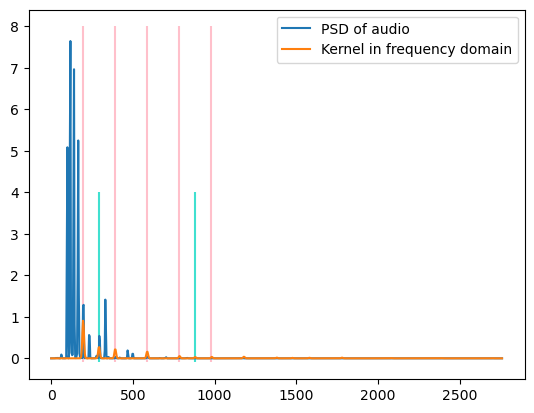

In [ ]:
# no_amp = -helper.relative_nlml(time_samples, sample, M=10,sigma_f=10,  f=f,T=0.465,v=2.37,normalised=True, amplitude=[1,1,1],sigma_n=sigma_n)
# plt.vlines([ 196, 196*2, 3*196,4*196, 5*196], ymin=-0.1, ymax=8, colors="pink" )
# plt.vlines([ 293,  293*3], ymin=-0.1, ymax=4, colors="turquoise" )
# # sample_data = sample_data.tolist()
# # print(sample_data)
# opt_amplitude = least_squares.opt_amplitude(sample_data,f=f, M=M, sigma_f=5, show=True,T=T,v=v )[0]
# # print(opt_amplitude)
# plt.title("G3 (196 Hz) and D4 (293 Hz)")
# plt.show()


[-0.14370535 -0.14484814 -0.14703347 ...  0.12396614  0.120969
  0.11863452]
[-0.14370535 -0.14484814 -0.14703347 ...  0.12396614  0.120969
  0.11863452]
[ 963.80108871 2267.45155608]


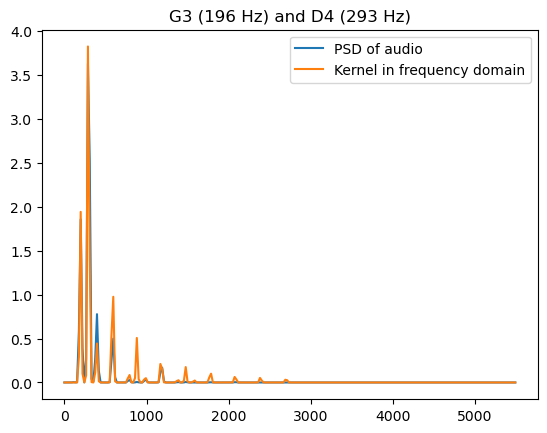

In [12]:

for sample in sample_data[:1]:
    # no_amp = -helper.relative_nlml(time_samples, sample, M=10,sigma_f=10,  f=f,T=0.465,v=2.37,normalised=True, amplitude=[1,1,1],sigma_n=sigma_n)
    # plt.vlines([ 196, 196*2, 3*196,4*196, 5*196,6*196, 7*196,  8*196], ymin=-0.1, ymax=4, colors="pink" )
    # plt.vlines([ 293,  293*3,  293*2,  293*4,  293*5, 293*6, 293*7], ymin=-0.1, ymax=4, colors="turquoise" )
    print(sample)
    opt_amplitude = least_squares.opt_amplitude(sample,f=f, M=M, sigma_f=10, show=True,T=T,v=v )[0]
    print(opt_amplitude)
    plt.title("G3 (196 Hz) and D4 (293 Hz)")
    plt.show()
    # amp = -helper.relative_nlml(time_samples, sample, f=f,M=10,T=0.465,v=2.37,sigma_f=10,  normalised=True,sigma_n=sigma_n, amplitude=opt_amplitude)
    # print(no_amp, amp)

In [ ]:

# print(a)
# plt.show()